In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime as dt
from datetime import timedelta as td

pd.set_option('display.max_columns',None)

In [7]:
#train_O = pd.read_csv(r"C:\Users\user\Desktop\Dataset\Datastorm\data-storm-20\New folder\Feature_Label_Encoded_OneHot_Encoded.csv")
#test_O = pd.read_csv(r"C:\Users\user\Desktop\Dataset\Datastorm\data-storm-20\New folder\test_Encoded.csv")
#validation_O = pd.read_csv(r"C:\Users\user\Desktop\Dataset\Datastorm\data-storm-20\New folder\validation_Encoded.csv")

train=pd.read_csv('final_train.csv')
test=pd.read_csv('final_test.csv')
validation=pd.read_csv('final_validation.csv')

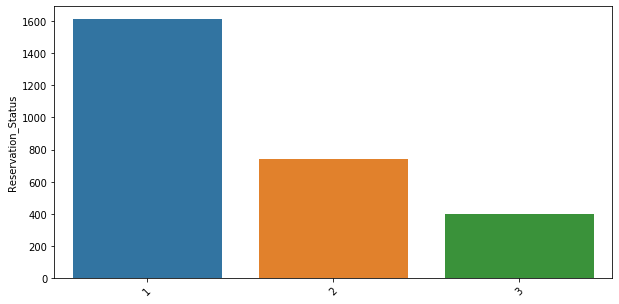

In [75]:
cat_num = validation_O['Reservation_Status'].value_counts()
f, ax = plt.subplots(figsize=(10,5))
plot = sn.barplot(x=cat_num.index, y=cat_num)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.show()

In [106]:
test_O["Expected_checkin"]=test_O["Expected_checkin"].apply(lambda x: dt.strptime(str(x), '%Y-%m-%d'))
test_O["Expected_checkout"]=test_O["Expected_checkout"].apply(lambda x: dt.strptime(str(x), '%Y-%m-%d'))
test_O["Booking_date"]=test_O["Booking_date"].apply(lambda x: dt.strptime(str(x), '%Y-%m-%d'))

test_O['days_booking_date']=test_O["Expected_checkin"]-test_O['Booking_date']
test_O['days_booking_date']=test_O['days_booking_date'].apply(lambda x:x.days)

In [92]:
train_O=train_O.drop(["days_bookind_date"],axis=1)

In [113]:
train_clean[train_clean.days_booking_date<0]

,Reservation-id,Gender,Age,Income,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Visted_Previously,Previous_Cancellations,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Eth__African American,Eth__Asian American,Eth__Latino,Eth__caucasian,Ed_L__College,Ed_L__Grad,Ed_L__High-School,Ed_L__Mid-School,Country_R__East,Country_R__North,Country_R__South,Country_R__West,Hotel_T__Airport Hotels,Hotel_T__City Hotel,Hotel_T__Resort,Meal_T__BB,Meal_T__FB,Meal_T__HB,Deposit_T__No Deposit,Deposit_T__Non-Refundable,Deposit_T__Refundable,Booking_C__Agent,Booking_C__Direct,Booking_C__Online,Expected_Checking_days,Reservation_Status,days_booking_date


In [122]:
train_clean

,Reservation-id,Gender,Age,Income,Adults,Children,Babies,Visted_Previously,Previous_Cancellations,Required_Car_Parking,Discount_Rate,Room_Rate,Eth__African American,Eth__Asian American,Eth__Latino,Eth__caucasian,Ed_L__College,Ed_L__Grad,Ed_L__High-School,Ed_L__Mid-School,Country_R__East,Country_R__North,Country_R__South,Country_R__West,Hotel_T__Airport Hotels,Hotel_T__City Hotel,Hotel_T__Resort,Meal_T__BB,Meal_T__FB,Meal_T__HB,Deposit_T__No Deposit,Deposit_T__Non-Refundable,Deposit_T__Refundable,Booking_C__Agent,Booking_C__Direct,Booking_C__Online,Expected_Checking_days,Reservation_Status,days_booking_date,cost
0,39428300,1,1,1,2,2,0,0,0,1,10,218,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,1,41,218.0
1,77491756,1,2,3,3,3,0,0,0,1,0,185,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,1,36,185.0
2,73747291,1,1,1,3,3,0,0,0,1,0,119,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,4,1,3,476.0
3,67301739,0,0,4,4,3,0,0,0,1,5,144,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,12,144.0
4,77222321,1,3,2,1,1,0,0,0,0,10,242,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,1,13,242.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,1,2,1,1,2,1,1,1,1,10,100,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,1,37,100.0
27495,56414525,1,2,2,2,1,0,0,0,1,40,194,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,3,127,194.0
27496,52023375,1,2,3,2,1,1,0,0,1,5,202,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,1,1,9,202.0
27497,98041387,0,3,2,3,2,0,0,0,0,20,157,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,2,98,157.0


In [114]:
train_clean = train_clean.drop(["Expected_checkin","Expected_checkout","Booking_date",'Use_Promotion'],axis=1)


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


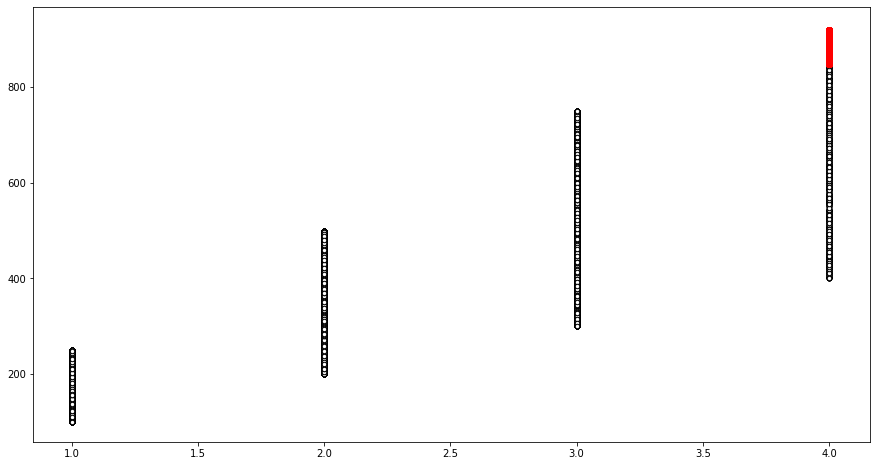

In [121]:
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt
import numpy as np
train_clean_Out['cost']=train_clean_Out['Expected_Checking_days']*train['Room_Rate']
X = np.array(train_clean_Out[['Expected_Checking_days','cost']])
ee = EllipticEnvelope(contamination=.01, random_state=0)
# predictions 
y_pred_ee = ee.fit_predict(X)
# predictions (-1: outlier, 1: normal)
anomalies = X[y_pred_ee == -1]
# plot data and outliers
plt.figure(figsize=(15, 8))
plt.scatter(X[:, 0], X[:, 1], c='white', s=20, edgecolor='k')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red');

In [119]:
cols = ['Expected_Checking_days', 'cost']

outliers = train_clean[y_pred_ee == -1][cols] \
    .groupby(cols[0]) \
    .agg({cols[1]: ['min', 'max', 'mean', 'std', 'median']})

In [120]:
train_clean_Out=train_clean[y_pred_ee != -1]

In [108]:
train_clean=train_clean.drop(['cost'],axis=1)

In [123]:
train_clean.to_csv('train_without_minus_days.csv',header=True,index=False)

In [34]:
train_1=train[train.Reservation_Status==1].sample(n=6708)
train_2_3=train[(train.Reservation_Status==3) | (train.Reservation_Status==2)]
train_X = pd.concat([train_1,train_2_3], ignore_index=True)

In [36]:
train_X = train_X.sample(frac=1).reset_index(drop=True)

In [39]:
train_X.to_csv('Balanced_train.csv',header=True,index=False)

In [70]:
X = train.iloc[:, 1:38]
y = train.iloc[:, 38].values

valX = validation.iloc[:, 1:38]
valy = validation.iloc[:, 38].values

In [59]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
scaler.fit(X)
train=scaler.transform(X)

In [72]:
from catboost import Pool

train_pool = Pool(data=X, label=y)
test_pool = Pool(data=valX, label=valy) 

In [73]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=640,
                           learning_rate=0.02,
                           depth=10,
                           loss_function='MultiClass',
                           class_weights=[0.17,0.9,1],
                           random_state=3)
                          

model.fit(train_pool)
preds_class = model.predict(test_pool)

0:	learn: 1.0955587	total: 539ms	remaining: 5m 44s
1:	learn: 1.0922583	total: 903ms	remaining: 4m 48s
2:	learn: 1.0892925	total: 1.3s	remaining: 4m 37s
3:	learn: 1.0863329	total: 1.61s	remaining: 4m 15s
4:	learn: 1.0833439	total: 1.81s	remaining: 3m 49s
5:	learn: 1.0804288	total: 2.02s	remaining: 3m 34s
6:	learn: 1.0777305	total: 2.2s	remaining: 3m 18s
7:	learn: 1.0750876	total: 2.42s	remaining: 3m 11s
8:	learn: 1.0721979	total: 2.58s	remaining: 3m
9:	learn: 1.0696191	total: 2.74s	remaining: 2m 52s
10:	learn: 1.0669103	total: 2.92s	remaining: 2m 46s
11:	learn: 1.0644908	total: 3.09s	remaining: 2m 41s
12:	learn: 1.0619788	total: 3.23s	remaining: 2m 35s
13:	learn: 1.0595517	total: 3.39s	remaining: 2m 31s
14:	learn: 1.0573964	total: 3.55s	remaining: 2m 27s
15:	learn: 1.0552295	total: 3.7s	remaining: 2m 24s
16:	learn: 1.0528647	total: 3.82s	remaining: 2m 20s
17:	learn: 1.0506870	total: 3.96s	remaining: 2m 16s
18:	learn: 1.0486378	total: 4.12s	remaining: 2m 14s
19:	learn: 1.0463330	total: 4

159:	learn: 0.8659227	total: 24.8s	remaining: 1m 14s
160:	learn: 0.8650328	total: 25s	remaining: 1m 14s
161:	learn: 0.8641007	total: 25.1s	remaining: 1m 14s
162:	learn: 0.8631832	total: 25.2s	remaining: 1m 13s
163:	learn: 0.8623107	total: 25.4s	remaining: 1m 13s
164:	learn: 0.8613189	total: 25.6s	remaining: 1m 13s
165:	learn: 0.8604873	total: 25.7s	remaining: 1m 13s
166:	learn: 0.8597095	total: 25.8s	remaining: 1m 13s
167:	learn: 0.8585701	total: 25.9s	remaining: 1m 12s
168:	learn: 0.8577977	total: 26.1s	remaining: 1m 12s
169:	learn: 0.8567551	total: 26.2s	remaining: 1m 12s
170:	learn: 0.8554274	total: 26.3s	remaining: 1m 12s
171:	learn: 0.8547767	total: 26.4s	remaining: 1m 11s
172:	learn: 0.8535507	total: 26.5s	remaining: 1m 11s
173:	learn: 0.8525200	total: 26.7s	remaining: 1m 11s
174:	learn: 0.8516373	total: 26.8s	remaining: 1m 11s
175:	learn: 0.8507983	total: 26.9s	remaining: 1m 10s
176:	learn: 0.8497620	total: 27s	remaining: 1m 10s
177:	learn: 0.8488241	total: 27.2s	remaining: 1m 1

319:	learn: 0.7342730	total: 54.1s	remaining: 54.1s
320:	learn: 0.7337507	total: 54.4s	remaining: 54s
321:	learn: 0.7330152	total: 54.7s	remaining: 54.1s
322:	learn: 0.7321050	total: 55.2s	remaining: 54.1s
323:	learn: 0.7314127	total: 55.6s	remaining: 54.3s
324:	learn: 0.7305962	total: 56s	remaining: 54.3s
325:	learn: 0.7298517	total: 56.4s	remaining: 54.3s
326:	learn: 0.7293129	total: 56.6s	remaining: 54.2s
327:	learn: 0.7284681	total: 56.8s	remaining: 54.1s
328:	learn: 0.7275070	total: 57.1s	remaining: 53.9s
329:	learn: 0.7265858	total: 57.3s	remaining: 53.8s
330:	learn: 0.7259933	total: 57.5s	remaining: 53.7s
331:	learn: 0.7253017	total: 57.7s	remaining: 53.5s
332:	learn: 0.7246214	total: 57.9s	remaining: 53.4s
333:	learn: 0.7241554	total: 58.1s	remaining: 53.3s
334:	learn: 0.7236163	total: 58.3s	remaining: 53.1s
335:	learn: 0.7226554	total: 58.6s	remaining: 53s
336:	learn: 0.7219258	total: 58.8s	remaining: 52.8s
337:	learn: 0.7214441	total: 59s	remaining: 52.7s
338:	learn: 0.720606

476:	learn: 0.6346377	total: 1m 43s	remaining: 35.4s
477:	learn: 0.6341428	total: 1m 43s	remaining: 35.2s
478:	learn: 0.6335248	total: 1m 44s	remaining: 35s
479:	learn: 0.6329310	total: 1m 44s	remaining: 34.8s
480:	learn: 0.6322315	total: 1m 44s	remaining: 34.6s
481:	learn: 0.6317348	total: 1m 44s	remaining: 34.4s
482:	learn: 0.6311325	total: 1m 45s	remaining: 34.2s
483:	learn: 0.6302724	total: 1m 45s	remaining: 33.9s
484:	learn: 0.6296081	total: 1m 45s	remaining: 33.7s
485:	learn: 0.6290840	total: 1m 45s	remaining: 33.6s
486:	learn: 0.6286721	total: 1m 46s	remaining: 33.4s
487:	learn: 0.6282391	total: 1m 46s	remaining: 33.2s
488:	learn: 0.6278045	total: 1m 47s	remaining: 33.1s
489:	learn: 0.6271671	total: 1m 47s	remaining: 32.9s
490:	learn: 0.6268144	total: 1m 47s	remaining: 32.8s
491:	learn: 0.6260371	total: 1m 48s	remaining: 32.6s
492:	learn: 0.6254198	total: 1m 48s	remaining: 32.4s
493:	learn: 0.6248747	total: 1m 49s	remaining: 32.4s
494:	learn: 0.6244371	total: 1m 49s	remaining: 3

633:	learn: 0.5518920	total: 2m 27s	remaining: 1.4s
634:	learn: 0.5515184	total: 2m 28s	remaining: 1.17s
635:	learn: 0.5510414	total: 2m 28s	remaining: 934ms
636:	learn: 0.5506776	total: 2m 28s	remaining: 700ms
637:	learn: 0.5500307	total: 2m 28s	remaining: 467ms
638:	learn: 0.5496819	total: 2m 29s	remaining: 234ms
639:	learn: 0.5492251	total: 2m 29s	remaining: 0us


In [66]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(valy,preds_class))
print(classification_report(valy,preds_class))

from sklearn.metrics import f1_score

f1_score(valy, preds_class, average='macro')

[[1055  519   36]
 [ 460  263   18]
 [ 243  153    2]]
              precision    recall  f1-score   support

           1       0.60      0.66      0.63      1610
           2       0.28      0.35      0.31       741
           3       0.04      0.01      0.01       398

    accuracy                           0.48      2749
   macro avg       0.31      0.34      0.32      2749
weighted avg       0.43      0.48      0.45      2749



0.31637920511917816

In [8]:
train

,Reservation-id,Gender,Age,Income,Adults,Children,Babies,Visted_Previously,Previous_Cancellations,Required_Car_Parking,Discount_Rate,Room_Rate,Eth__African American,Eth__Asian American,Eth__Latino,Eth__caucasian,Ed_L__College,Ed_L__Grad,Ed_L__High-School,Ed_L__Mid-School,Country_R__East,Country_R__North,Country_R__South,Country_R__West,Hotel_T__Airport Hotels,Hotel_T__City Hotel,Hotel_T__Resort,Meal_T__BB,Meal_T__FB,Meal_T__HB,Deposit_T__No Deposit,Deposit_T__Non-Refundable,Deposit_T__Refundable,Booking_C__Agent,Booking_C__Direct,Booking_C__Online,Expected_Checking_days,week_end/day,Reservation_Status
0,39428300,1,1,1,2,2,0,0,0,1,10,218,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,1
1,77491756,1,2,3,3,3,0,0,0,1,0,185,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1
2,73747291,1,1,1,3,3,0,0,0,1,0,119,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,4,0,1
3,67301739,0,0,4,4,3,0,0,0,1,5,144,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,1
4,77222321,1,3,2,1,1,0,0,0,0,10,242,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,1,2,1,1,2,1,1,1,1,10,100,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,1
27495,56414525,1,2,2,2,1,0,0,0,1,40,194,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,3
27496,52023375,1,2,3,2,1,1,0,0,1,5,202,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,1
27497,98041387,0,3,2,3,2,0,0,0,0,20,157,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,2


In [18]:
corrMatrix = train.corr()
#corrMatrix1.Reservation_Status
tx1=corrMatrix1[(corrMatrix1.Reservation_Status>=0.005) | (corrMatrix1.Reservation_Status<=-0.005)].Reservation_Status.reset_index()

In [45]:
#labels=list(tx1['index'])
train_label2=train[labels]
validation_label2=validation[labels]


In [44]:
len(labels)

15

In [43]:
labels.append('Reservation_Status')

In [42]:
del labels[-1]

In [37]:
test_label2=test[labels]


In [46]:
train_label2

,Children,Visted_Previously,Eth__African American,Eth__caucasian,Country_R__North,Hotel_T__Airport Hotels,Hotel_T__Resort,Meal_T__BB,Meal_T__FB,Meal_T__HB,Deposit_T__No Deposit,Deposit_T__Refundable,week_end/day,Reservation-id,Reservation_Status
0,2,0,0,0,1,0,0,1,0,0,1,0,0,39428300,1
1,3,0,0,0,0,0,0,1,0,0,0,1,0,77491756,1
2,3,0,0,1,0,0,0,1,0,0,1,0,0,73747291,1
3,3,0,1,0,0,1,0,1,0,0,0,1,0,67301739,1
4,1,0,0,0,0,0,1,1,0,0,1,0,1,77222321,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,2,1,1,0,0,0,0,0,0,1,1,0,0,15645505,1
27495,1,0,0,0,0,1,0,1,0,0,0,1,0,56414525,3
27496,1,0,0,0,0,1,0,0,0,1,1,0,0,52023375,1
27497,2,0,1,0,0,1,0,0,1,0,1,0,0,98041387,2


In [47]:
train_label2.to_csv('train_feature_0.005.csv',header=True,index=False)
test_label2.to_csv('test_feature_0.005.csv',header=True,index=False)
validation_label2.to_csv('validation_feature_0.005.csv',header=True,index=False)

In [255]:
X = train_label1.iloc[:, 1:26]
y = train_label1.iloc[:, 26].values

valX = validation_label1.iloc[:, 1:26]
valy = validation_label1.iloc[:, 26].values

In [256]:
y

array([1, 1, 1, ..., 1, 2, 3], dtype=int64)

In [257]:
from catboost import Pool

train_pool = Pool(data=X, label=y)
test_pool = Pool(data=valX, label=valy) 

In [262]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=715,
                           learning_rate=0.03,
                           depth=10,
                           loss_function='MultiClass',
                           class_weights=[0.17,0.8,0.998],
                           random_state=3)
                          

model.fit(train_pool)
preds_class = model.predict(test_pool)

0:	learn: 1.0939703	total: 395ms	remaining: 5m 15s
1:	learn: 1.0898769	total: 710ms	remaining: 4m 43s
2:	learn: 1.0862247	total: 1.07s	remaining: 4m 44s
3:	learn: 1.0823738	total: 1.51s	remaining: 5m
4:	learn: 1.0785583	total: 1.9s	remaining: 5m 1s
5:	learn: 1.0752982	total: 2.09s	remaining: 4m 36s
6:	learn: 1.0722215	total: 2.33s	remaining: 4m 23s
7:	learn: 1.0686351	total: 2.5s	remaining: 4m 7s
8:	learn: 1.0651068	total: 2.71s	remaining: 3m 57s
9:	learn: 1.0618399	total: 2.9s	remaining: 3m 49s
10:	learn: 1.0588887	total: 3.1s	remaining: 3m 42s
11:	learn: 1.0558069	total: 3.25s	remaining: 3m 33s
12:	learn: 1.0524865	total: 3.44s	remaining: 3m 28s
13:	learn: 1.0496539	total: 3.62s	remaining: 3m 22s
14:	learn: 1.0464233	total: 3.8s	remaining: 3m 18s
15:	learn: 1.0436178	total: 3.96s	remaining: 3m 14s
16:	learn: 1.0411380	total: 4.16s	remaining: 3m 11s
17:	learn: 1.0383376	total: 4.27s	remaining: 3m 5s
18:	learn: 1.0356091	total: 4.42s	remaining: 3m 1s
19:	learn: 1.0327596	total: 4.63s	r

158:	learn: 0.8334244	total: 21.4s	remaining: 1m 26s
159:	learn: 0.8321821	total: 21.5s	remaining: 1m 25s
160:	learn: 0.8310805	total: 21.6s	remaining: 1m 25s
161:	learn: 0.8301775	total: 21.8s	remaining: 1m 25s
162:	learn: 0.8288504	total: 21.9s	remaining: 1m 25s
163:	learn: 0.8273462	total: 22s	remaining: 1m 25s
164:	learn: 0.8261672	total: 22.1s	remaining: 1m 24s
165:	learn: 0.8252130	total: 22.2s	remaining: 1m 24s
166:	learn: 0.8240302	total: 22.3s	remaining: 1m 24s
167:	learn: 0.8231079	total: 22.4s	remaining: 1m 24s
168:	learn: 0.8219031	total: 22.5s	remaining: 1m 24s
169:	learn: 0.8210370	total: 22.6s	remaining: 1m 23s
170:	learn: 0.8197060	total: 22.7s	remaining: 1m 23s
171:	learn: 0.8190028	total: 22.8s	remaining: 1m 23s
172:	learn: 0.8182968	total: 22.9s	remaining: 1m 23s
173:	learn: 0.8170161	total: 23s	remaining: 1m 22s
174:	learn: 0.8163149	total: 23.1s	remaining: 1m 22s
175:	learn: 0.8149954	total: 23.3s	remaining: 1m 22s
176:	learn: 0.8141579	total: 23.4s	remaining: 1m 2

314:	learn: 0.6950895	total: 42.3s	remaining: 1m 5s
315:	learn: 0.6945951	total: 42.4s	remaining: 1m 5s
316:	learn: 0.6939852	total: 42.6s	remaining: 1m 4s
317:	learn: 0.6934791	total: 42.7s	remaining: 1m 4s
318:	learn: 0.6925905	total: 42.8s	remaining: 1m 4s
319:	learn: 0.6916106	total: 42.9s	remaining: 1m 4s
320:	learn: 0.6908463	total: 43.1s	remaining: 1m 4s
321:	learn: 0.6898535	total: 43.2s	remaining: 1m 4s
322:	learn: 0.6890128	total: 43.3s	remaining: 1m 3s
323:	learn: 0.6880764	total: 43.4s	remaining: 1m 3s
324:	learn: 0.6874857	total: 43.5s	remaining: 1m 3s
325:	learn: 0.6868490	total: 43.6s	remaining: 1m 3s
326:	learn: 0.6861710	total: 43.8s	remaining: 1m 3s
327:	learn: 0.6854109	total: 43.9s	remaining: 1m 3s
328:	learn: 0.6849198	total: 44s	remaining: 1m 2s
329:	learn: 0.6839473	total: 44.1s	remaining: 1m 2s
330:	learn: 0.6831464	total: 44.2s	remaining: 1m 2s
331:	learn: 0.6823941	total: 44.3s	remaining: 1m 2s
332:	learn: 0.6815872	total: 44.4s	remaining: 1m 2s
333:	learn: 0.

474:	learn: 0.5865354	total: 1m 4s	remaining: 43.8s
475:	learn: 0.5859329	total: 1m 4s	remaining: 43.7s
476:	learn: 0.5852938	total: 1m 4s	remaining: 43.6s
477:	learn: 0.5848440	total: 1m 4s	remaining: 43.5s
478:	learn: 0.5843212	total: 1m 4s	remaining: 43.4s
479:	learn: 0.5840729	total: 1m 4s	remaining: 43.2s
480:	learn: 0.5832968	total: 1m 4s	remaining: 43.1s
481:	learn: 0.5827970	total: 1m 5s	remaining: 42.9s
482:	learn: 0.5821546	total: 1m 5s	remaining: 42.8s
483:	learn: 0.5816385	total: 1m 5s	remaining: 42.6s
484:	learn: 0.5809061	total: 1m 5s	remaining: 42.5s
485:	learn: 0.5803063	total: 1m 5s	remaining: 42.3s
486:	learn: 0.5797670	total: 1m 5s	remaining: 42.2s
487:	learn: 0.5791469	total: 1m 5s	remaining: 42s
488:	learn: 0.5786031	total: 1m 5s	remaining: 41.9s
489:	learn: 0.5780049	total: 1m 5s	remaining: 41.7s
490:	learn: 0.5775875	total: 1m 6s	remaining: 41.6s
491:	learn: 0.5772156	total: 1m 6s	remaining: 41.5s
492:	learn: 0.5766426	total: 1m 6s	remaining: 41.3s
493:	learn: 0.

631:	learn: 0.5082557	total: 1m 32s	remaining: 24.6s
632:	learn: 0.5078475	total: 1m 32s	remaining: 24.5s
633:	learn: 0.5075016	total: 1m 33s	remaining: 24.4s
634:	learn: 0.5069981	total: 1m 33s	remaining: 24.3s
635:	learn: 0.5064715	total: 1m 33s	remaining: 24.2s
636:	learn: 0.5061115	total: 1m 34s	remaining: 24.1s
637:	learn: 0.5057616	total: 1m 34s	remaining: 24s
638:	learn: 0.5053179	total: 1m 34s	remaining: 23.9s
639:	learn: 0.5048495	total: 1m 35s	remaining: 23.8s
640:	learn: 0.5043047	total: 1m 35s	remaining: 23.7s
641:	learn: 0.5038317	total: 1m 35s	remaining: 23.6s
642:	learn: 0.5033676	total: 1m 35s	remaining: 23.4s
643:	learn: 0.5030864	total: 1m 36s	remaining: 23.3s
644:	learn: 0.5027377	total: 1m 36s	remaining: 23.2s
645:	learn: 0.5023209	total: 1m 36s	remaining: 23.1s
646:	learn: 0.5018289	total: 1m 37s	remaining: 23s
647:	learn: 0.5015494	total: 1m 37s	remaining: 22.9s
648:	learn: 0.5010004	total: 1m 37s	remaining: 22.8s
649:	learn: 0.5004945	total: 1m 38s	remaining: 22.

788:	learn: 0.4428303	total: 2m 3s	remaining: 1.72s
789:	learn: 0.4425650	total: 2m 3s	remaining: 1.56s
790:	learn: 0.4422201	total: 2m 3s	remaining: 1.41s
791:	learn: 0.4418180	total: 2m 3s	remaining: 1.25s
792:	learn: 0.4413680	total: 2m 3s	remaining: 1.09s
793:	learn: 0.4409518	total: 2m 4s	remaining: 938ms
794:	learn: 0.4406590	total: 2m 4s	remaining: 782ms
795:	learn: 0.4402997	total: 2m 4s	remaining: 625ms
796:	learn: 0.4397948	total: 2m 4s	remaining: 469ms
797:	learn: 0.4393662	total: 2m 4s	remaining: 313ms
798:	learn: 0.4390193	total: 2m 4s	remaining: 156ms
799:	learn: 0.4386583	total: 2m 5s	remaining: 0us


In [263]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(valy,preds_class))
print(classification_report(valy,preds_class))

from sklearn.metrics import f1_score

f1_score(valy, preds_class, average='macro')

[[1135  393   82]
 [ 527  187   27]
 [ 283   93   22]]
              precision    recall  f1-score   support

           1       0.58      0.70      0.64      1610
           2       0.28      0.25      0.26       741
           3       0.17      0.06      0.08       398

    accuracy                           0.49      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.44      0.49      0.46      2749



0.328736984403525

In [233]:

from sklearn.metrics import f1_score
pr = model.predict(test_label.iloc[:,1:19])

results = pd.DataFrame()
results['Reservation-id']=test_O['Reservation-id']
results['Reservation_status']=pr

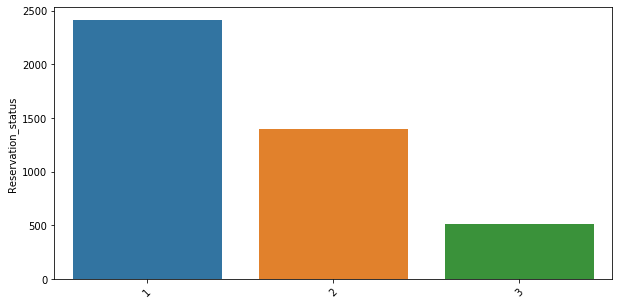

In [265]:
cat_num = results['Reservation_status'].value_counts()
f, ax = plt.subplots(figsize=(10,5))
plot = sn.barplot(x=cat_num.index, y=cat_num)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.show()

In [266]:
cat_num

1    2409
2    1396
3     513
Name: Reservation_status, dtype: int64

In [236]:
results.to_csv('Results7.csv',header=True,index=False)

In [268]:
test_OI=test_O.merge(results,how='left',left_on='Reservation-id', right_on='Reservation-id')

In [51]:
T = pd.read_csv('Hotel-A-test.csv')

In [52]:
T["Expected_checkin"]=T["Expected_checkin"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))
T["Expected_checkout"]=T["Expected_checkout"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))
T["Booking_date"]=T["Booking_date"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))

In [54]:
TB = T[['Reservation-id',"Expected_checkin"]]
TB.to_csv('id_Expected_checkin.csv',header=True,index=False)

In [55]:
TB = T[['Reservation-id',"Expected_checkout"]]
TB.to_csv('id_Expected_checkout.csv',header=True,index=False)

In [275]:
Calender = pd.DataFrame()

T_O['Ex_checkiYear']=T_O["Expected_checkin"].apply(lambda x:x.year)
T_O['Ex_checkin_month']=T_O["Expected_checkin"].apply(lambda x:x.month)
T_O['Ex_checkin_day']=T_O["Expected_checkin"].apply(lambda x:x.day)

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate
0,62931593,F,52,Latino,Grad,25K --50K,South,City Hotel,2016-11-18,2016-11-19,2016-10-28,3,3,0,HB,No,No,No Deposit,Direct,Yes,Yes,10,153
1,70586099,F,47,Latino,Grad,25K --50K,East,Airport Hotels,2016-11-18,2016-11-19,2016-08-06,2,1,0,FB,No,No,No Deposit,Online,No,No,0,210
2,4230648,F,28,Asian American,Grad,<25K,East,City Hotel,2017-04-28,2017-05-01,2017-04-08,2,2,0,BB,No,No,No Deposit,Agent,No,Yes,5,117
3,25192322,F,65,caucasian,High-School,25K --50K,South,Airport Hotels,2016-11-18,2016-11-20,2016-05-20,1,3,2,FB,No,No,No Deposit,Online,Yes,Yes,10,107
4,80931528,M,45,African American,College,25K --50K,South,City Hotel,2016-11-18,2016-11-20,2016-10-31,3,1,0,BB,No,No,Refundable,Agent,No,No,0,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,39110574,M,53,Latino,College,50K -- 100K,South,Resort,2017-03-29,2017-03-30,2016-09-11,3,3,1,FB,Yes,No,Non-Refundable,Online,Yes,No,0,153
4314,5496554,F,63,caucasian,College,50K -- 100K,South,Resort,2017-03-29,2017-04-01,2017-02-10,3,3,0,HB,No,No,Refundable,Agent,Yes,Yes,40,233
4315,59004046,F,59,caucasian,Grad,<25K,East,Airport Hotels,2017-03-29,2017-03-30,2016-08-26,2,3,0,FB,No,No,No Deposit,Direct,Yes,No,0,242
4316,65838682,M,43,African American,College,25K --50K,West,Resort,2017-03-29,2017-03-30,2017-03-04,4,2,1,BB,No,No,No Deposit,Online,Yes,No,0,208


In [274]:
T.to_csv('Hotel-A-test_date.csv',header=True,index=False)


In [48]:
#R6 = pd.read_csv('Results6.csv')
#R8 = pd.read_csv('Results8.csv')
R5 = pd.read_csv('Results5.csv')

1    1956
2    1434
3     928
Name: Reservation_status, dtype: int64


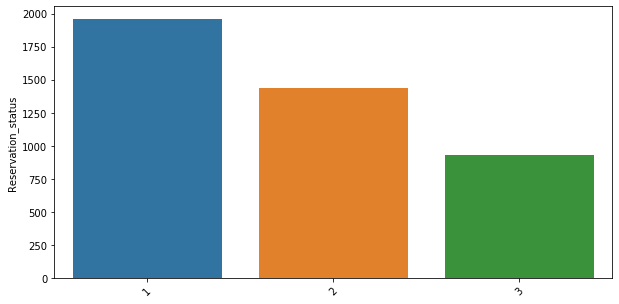

In [4]:
cat_num = R6['Reservation_status'].value_counts()
f, ax = plt.subplots(figsize=(10,5))
plot = sn.barplot(x=cat_num.index, y=cat_num)
print(cat_num)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.show()

1    2557
2    1134
3     627
Name: Reservation_status, dtype: int64


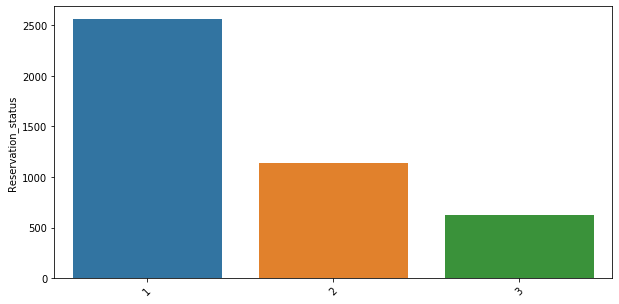

In [5]:
cat_num = R8['Reservation_status'].value_counts()
f, ax = plt.subplots(figsize=(10,5))
plot = sn.barplot(x=cat_num.index, y=cat_num)
print(cat_num)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.show()

1    3036
2     776
3     506
Name: Reservation_status, dtype: int64


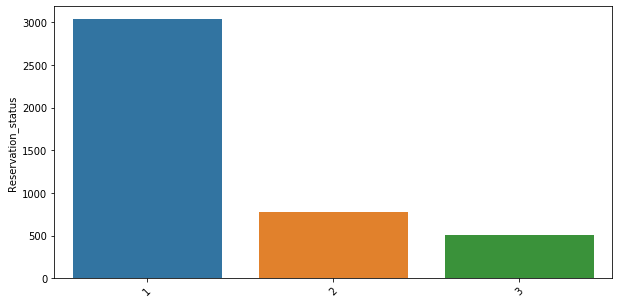

In [49]:
cat_num = R5['Reservation_status'].value_counts()
f, ax = plt.subplots(figsize=(10,5))
plot = sn.barplot(x=cat_num.index, y=cat_num)
print(cat_num)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.show()